##### Name :Lavit Dani   | Phone:9653427029  |  Phone:9653427029
###### _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  _ _ _ _ 
 Business Problem :Prepare a model for the HR department to predict the Attrition and give the insights from the data
 about the important factors associated with the attrition so that HR can take the corrective or
previntive measures to stop or control the attrition.



In [3]:


#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>IMPORTING<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

In [4]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>DATA IMPORTING<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


df=pd.read_csv(r'C:\Users\lavit\Downloads\HR_Employee_Attrition_Data.csv')

# BASIC INFORMATION ON DATASET


In [3]:
df.shape
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2937,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2938,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [5]:
# Checking for NULL values 
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Removing three Constant Columns(EmployeeCount,Over18,StandardHours) and EmplyeeNumber
df=df.drop(columns =['EmployeeCount','Over18',"StandardHours"])

In [7]:
df.shape

(2940, 32)

In [8]:
# Genral Stats of Data 
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.describe(include=np.object)

C:\Users\lavit\AppData\Local\Temp\ipykernel_1220\3211851552.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=np.object)


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,2940,2940,2940,2940,2940,2940,2940,2940
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,2466,2086,1922,1212,1764,652,1346,2108


# EDA

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


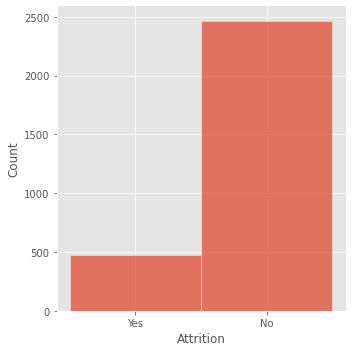

In [10]:
#  Atrrtition 
x=df.Attrition.value_counts()/len(df)*100
print(x)

sns.displot(df["Attrition"])

# 16 PERCENT OF PEOPLE LEFT THE COMPANY.

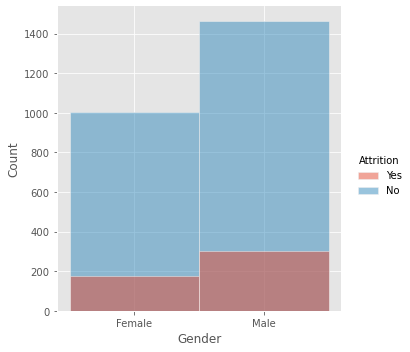

In [11]:
# Gender

sns.displot(data = df, x = "Gender", hue = "Attrition")
 # More Number of Males have left the Company than Females

EducationField    Attrition
Human Resources   No             40
                  Yes            14
Life Sciences     No           1034
                  Yes           178
Marketing         No            248
                  Yes            70
Medical           No            802
                  Yes           126
Other             No            142
                  Yes            22
Technical Degree  No            200
                  Yes            64
Name: Attrition, dtype: int64


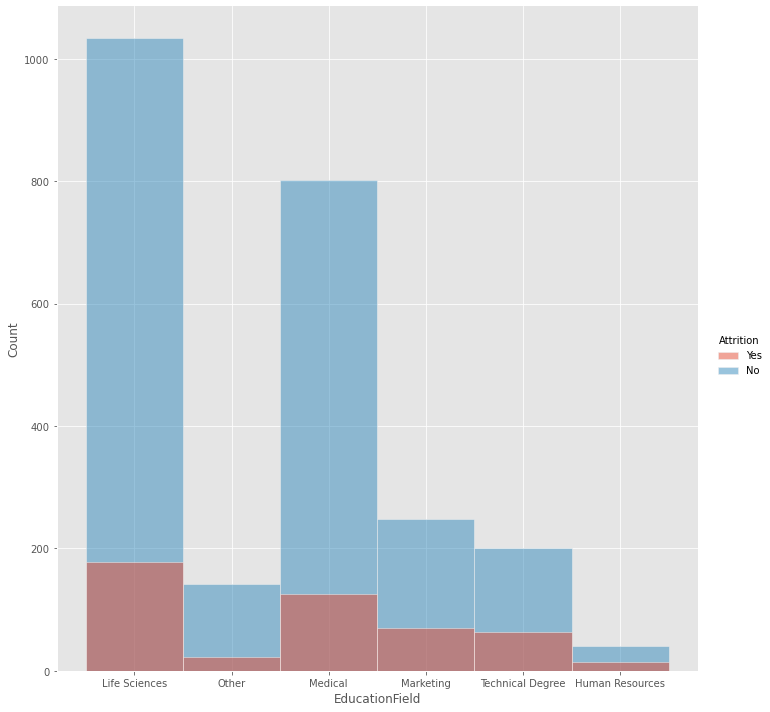

In [12]:
# EducationField
x=df.groupby("EducationField")["Attrition"].value_counts()

print(x)


sns.displot(data = df, x = "EducationField", hue = "Attrition",height=10)

# HR DEPARTMENT HAS MOST NUMBER OF ATTRITION (25%)


MaritalStatus  Attrition
Divorced       No            588
               Yes            66
Married        No           1178
               Yes           168
Single         No            700
               Yes           240
Name: Attrition, dtype: int64


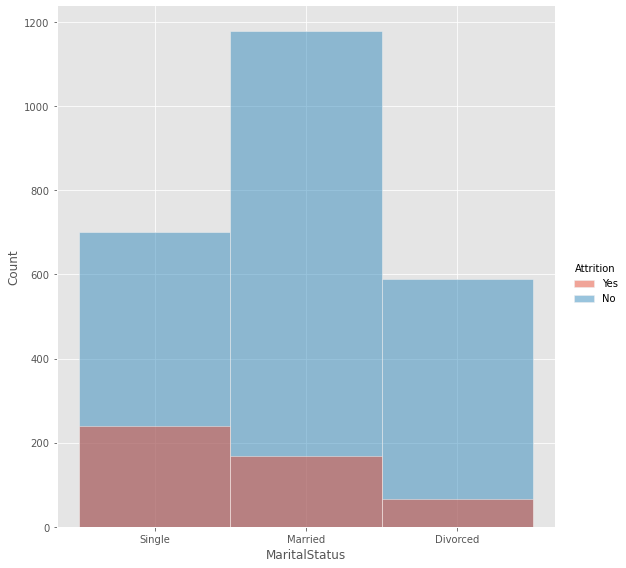

In [13]:
# MaritalStatus
ms=df.groupby("MaritalStatus")["Attrition"].value_counts()
print(ms)

sns.displot(data = df, x = "MaritalStatus", hue = "Attrition",height=8)

# Single Category has most Attrition(25.5%)

BusinessTravel     Attrition
Non-Travel         No            276
                   Yes            24
Travel_Frequently  No            416
                   Yes           138
Travel_Rarely      No           1774
                   Yes           312
Name: Attrition, dtype: int64


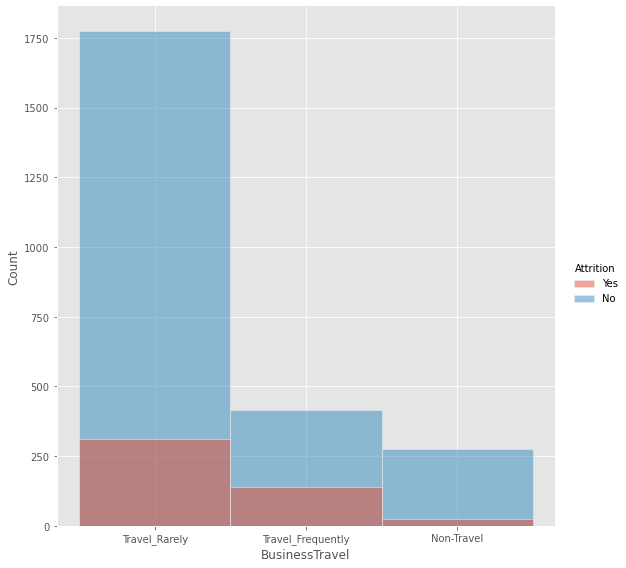

In [14]:
# BusinessTravel 
bs=df.groupby("BusinessTravel")["Attrition"].value_counts()
print(bs)

sns.displot(data = df, x = "BusinessTravel", hue = "Attrition",height=8)

# People Who Travel Frequently has more Chances of Attrition(24.9%)

Department              Attrition
Human Resources         No            102
                        Yes            24
Research & Development  No           1656
                        Yes           266
Sales                   No            708
                        Yes           184
Name: Attrition, dtype: int64


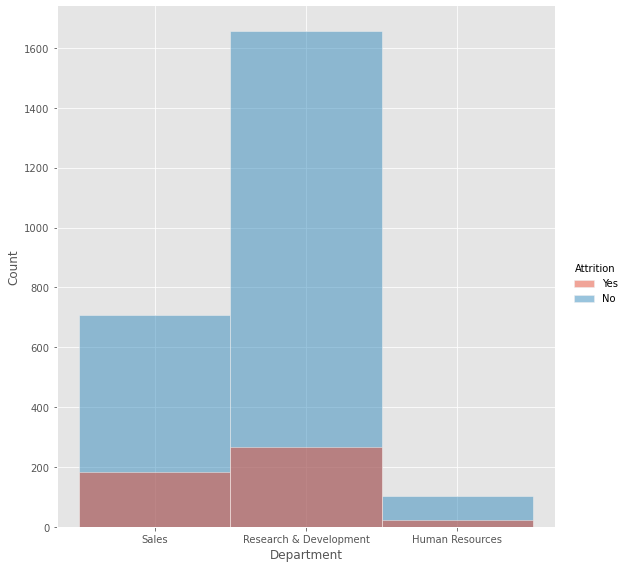

In [15]:
#  Department 
dp=df.groupby("Department")["Attrition"].value_counts()
print(dp)

sns.displot(data = df, x = "Department", hue = "Attrition",height=8)

# Dpeartment wise Sales has higest Attrition(20%)but HR is close with(19%)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeNumber            2940 non-null   int64 
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

JobRole                    Attrition
Healthcare Representative  No           244
                           Yes           18
Human Resources            No            80
                           Yes           24
Laboratory Technician      No           394
                           Yes          124
Manager                    No           194
                           Yes           10
Manufacturing Director     No           270
                           Yes           20
Research Director          No           156
                           Yes            4
Research Scientist         No           490
                           Yes           94
Sales Executive            No           538
                           Yes          114
Sales Representative       No           100
                           Yes           66
Name: Attrition, dtype: int64


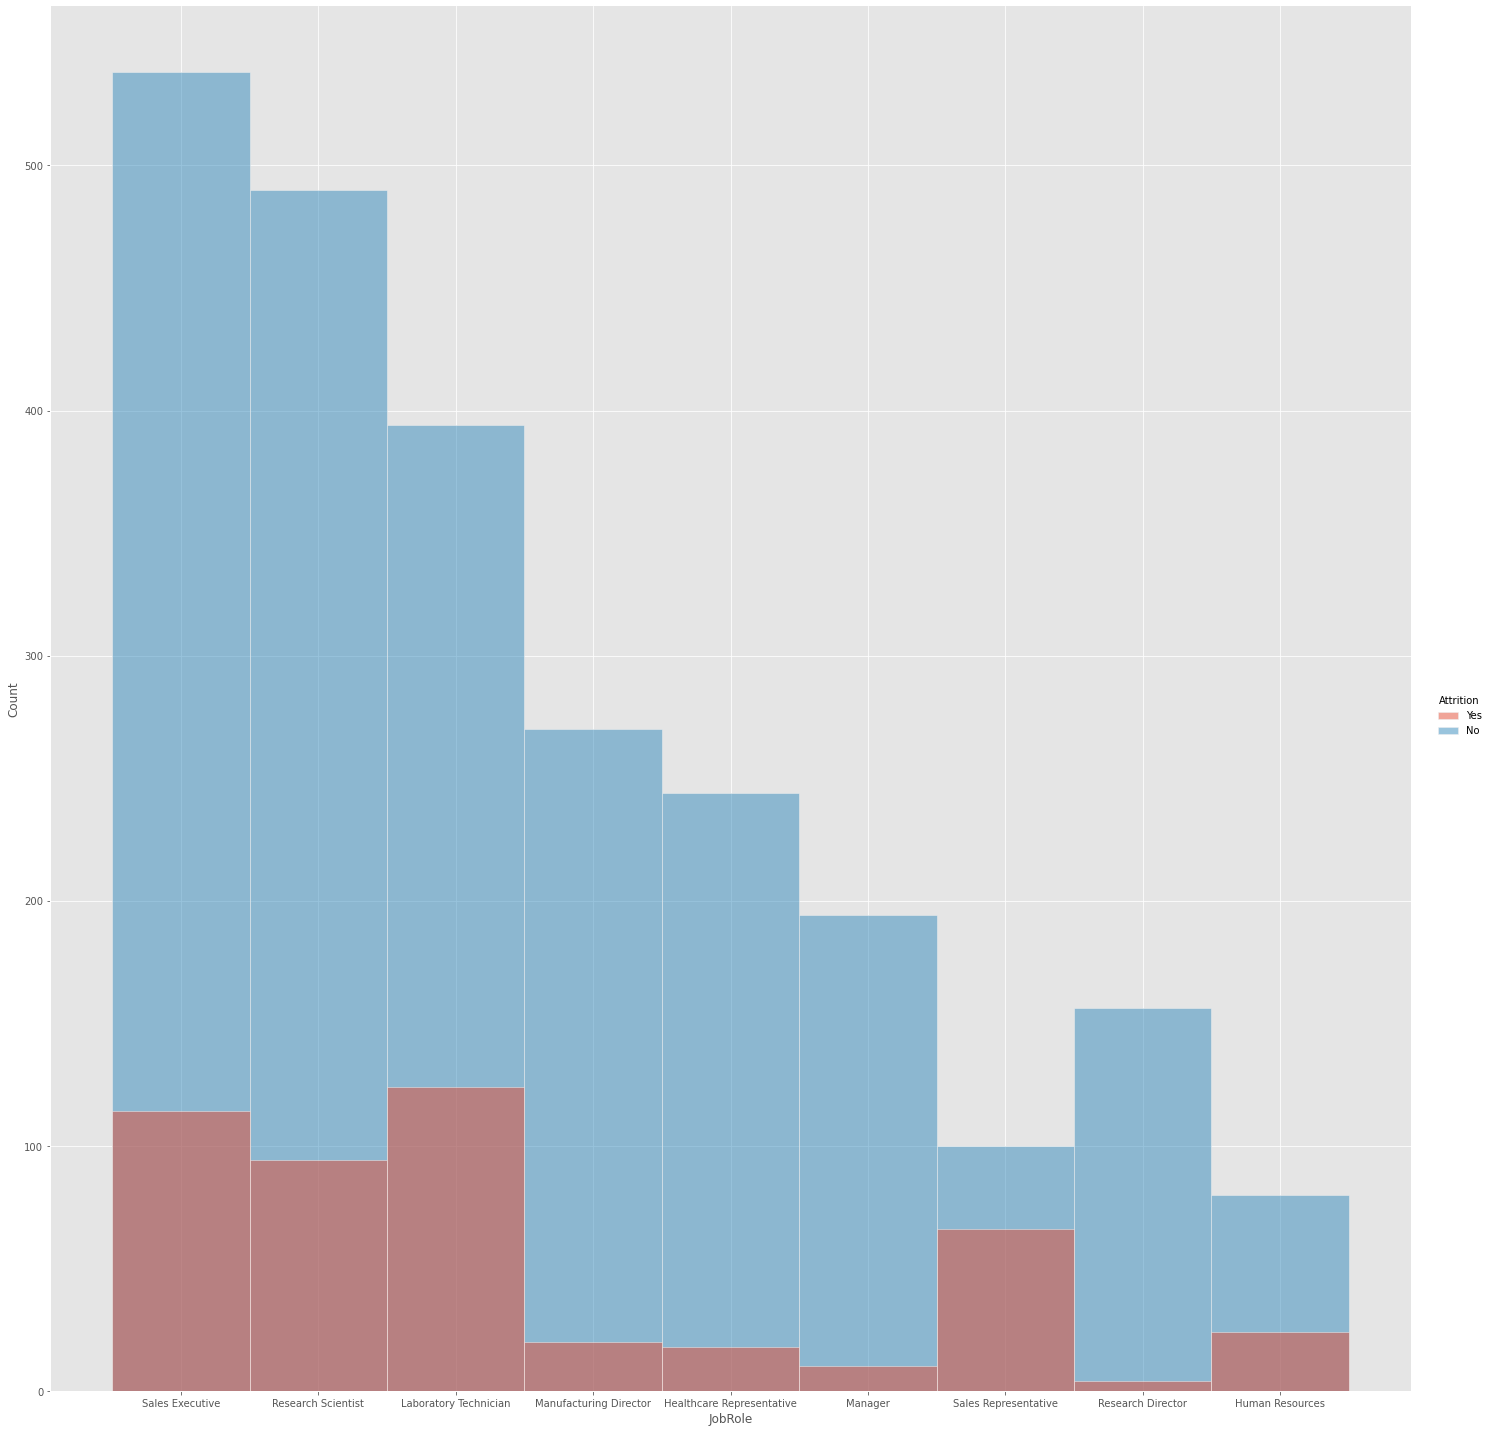

In [17]:
# JobRole
jr=df.groupby("JobRole")["Attrition"].value_counts()
print(jr)

sns.displot(data = df, x = "JobRole", hue = "Attrition",height=20)

# Sales Representive has higest attrition of 39.75 percent followed by Laboratory Tech(23.9) and HR(23.07)


In [18]:
((66)/(100+66))*100

39.75903614457831

OverTime  Attrition
No        No           1888
          Yes           220
Yes       No            578
          Yes           254
Name: Attrition, dtype: int64


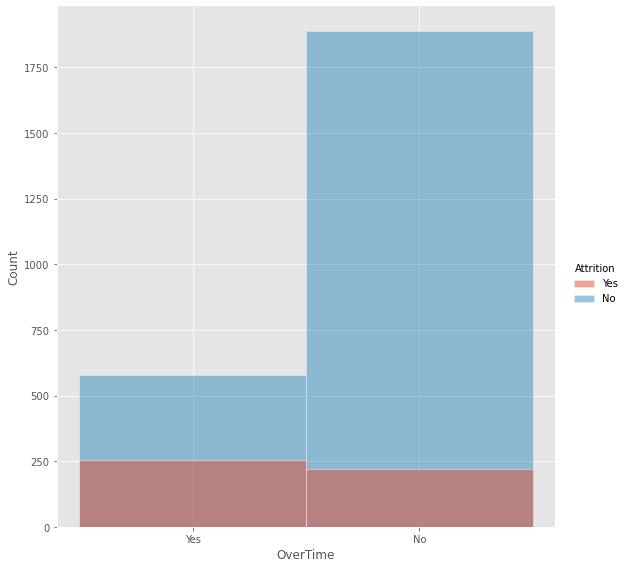

In [6]:
# OverTime
ot=df.groupby("OverTime")["Attrition"].value_counts()
print(ot)

sns.displot(data = df, x = "OverTime", hue = "Attrition",height=8)


# Most people with overtime has hight chances of Attrition

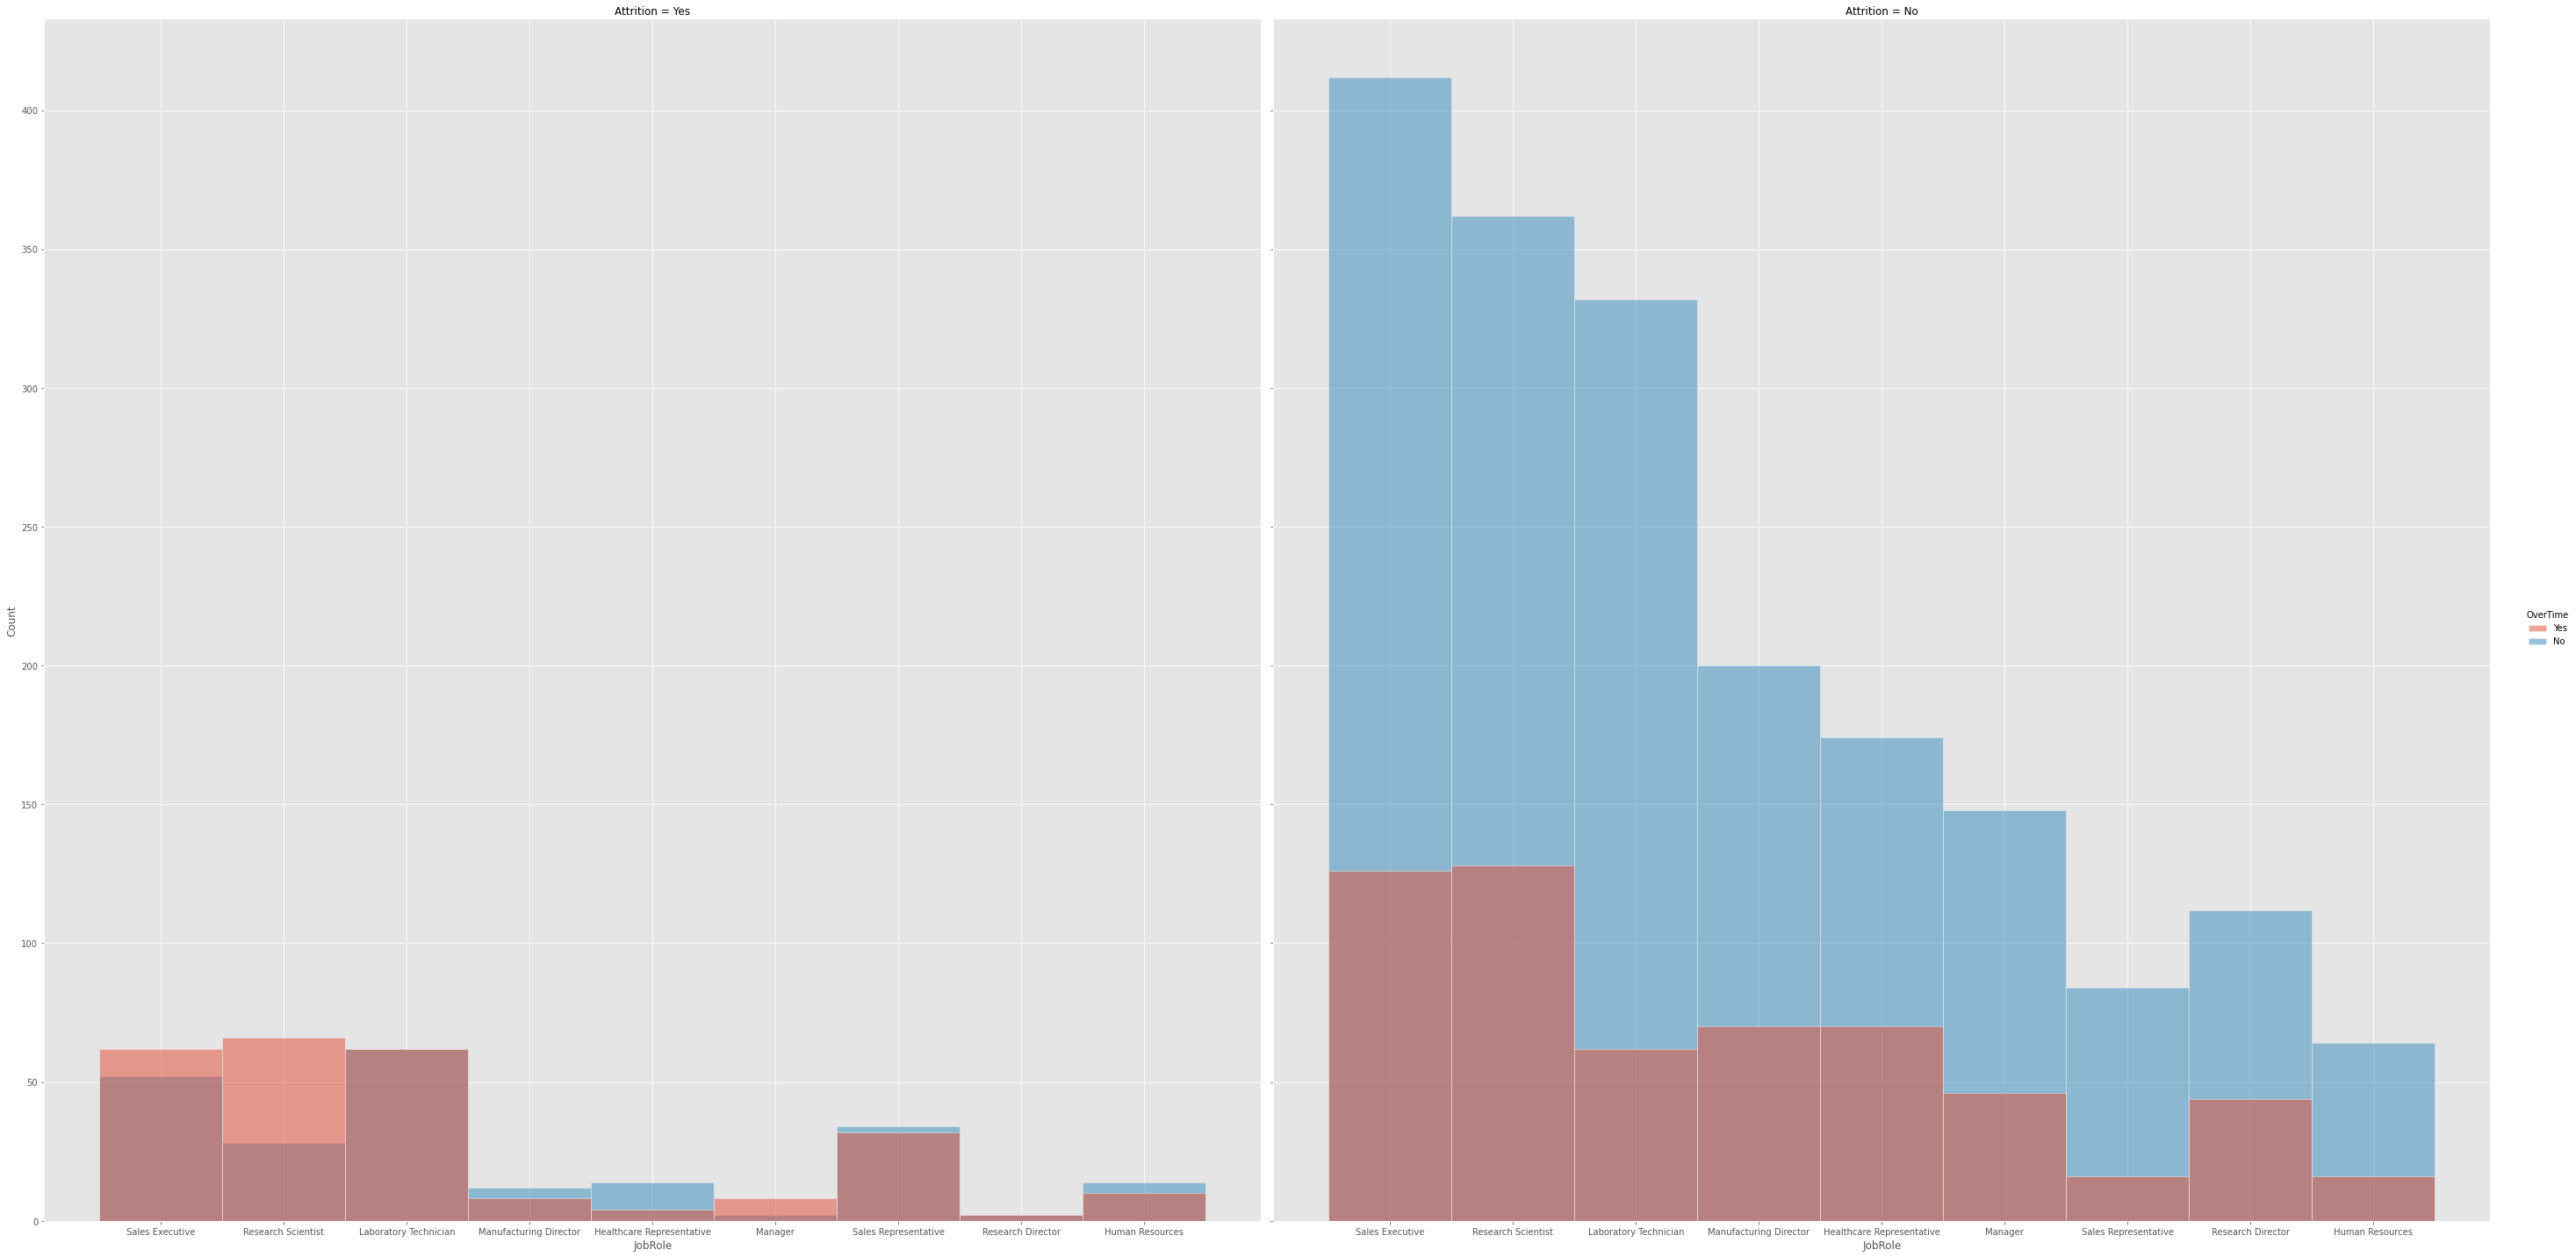

In [18]:
sns.displot(data = df, x = "JobRole", hue = "OverTime",height=20,col="Attrition")
# Most people leaving in diffrent deparent mostly are working over

EnvironmentSatisfaction  Attrition
1                        No           424
                         Yes          144
2                        No           488
                         Yes           86
3                        No           782
                         Yes          124
4                        No           772
                         Yes          120
Name: Attrition, dtype: int64


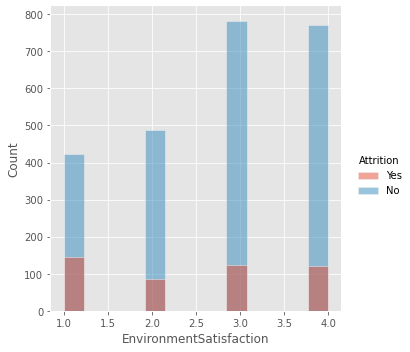

In [20]:
#  EnvironmentSatisfaction

es=df.groupby("EnvironmentSatisfaction")["Attrition"].value_counts()
print(es)

sns.displot(data = df, x = "EnvironmentSatisfaction", hue = "Attrition",height=5)

# We can infer that as rating increases the chances of Attrition Decrease.

RelationshipSatisfaction  Attrition
1                         No           438
                          Yes          114
2                         No           516
                          Yes           90
3                         No           776
                          Yes          142
4                         No           736
                          Yes          128
Name: Attrition, dtype: int64


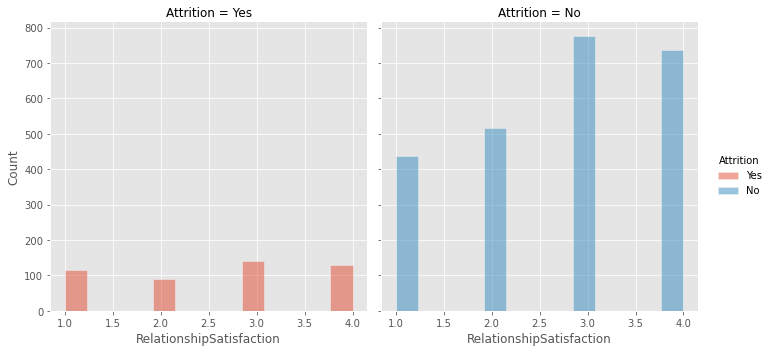

In [21]:
# RelationshipSatisfaction

rsm=df.groupby("RelationshipSatisfaction")["Attrition"].value_counts()
print(rsm)

sns.displot(data = df, x = "RelationshipSatisfaction", hue = "Attrition",height=5,col= "Attrition")

# better relationship with managers is causing less Attrition .


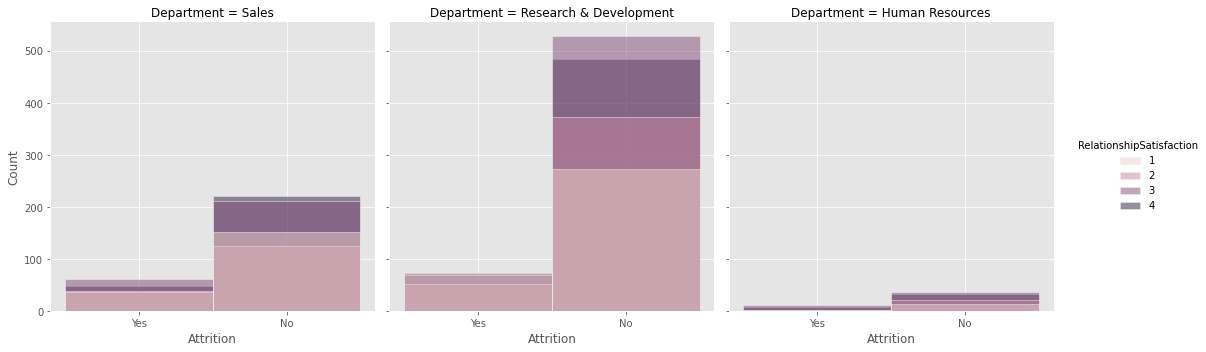

In [19]:
# Plotting for RelationshipSatisfaction while considering department and attrition.
sns.displot(data = df, x = "Attrition", hue = "RelationshipSatisfaction",height=5,col= "Department")


WorkLifeBalance  Attrition
1                No            110
                 Yes            50
2                No            572
                 Yes           116
3                No           1532
                 Yes           254
4                No            252
                 Yes            54
Name: Attrition, dtype: int64


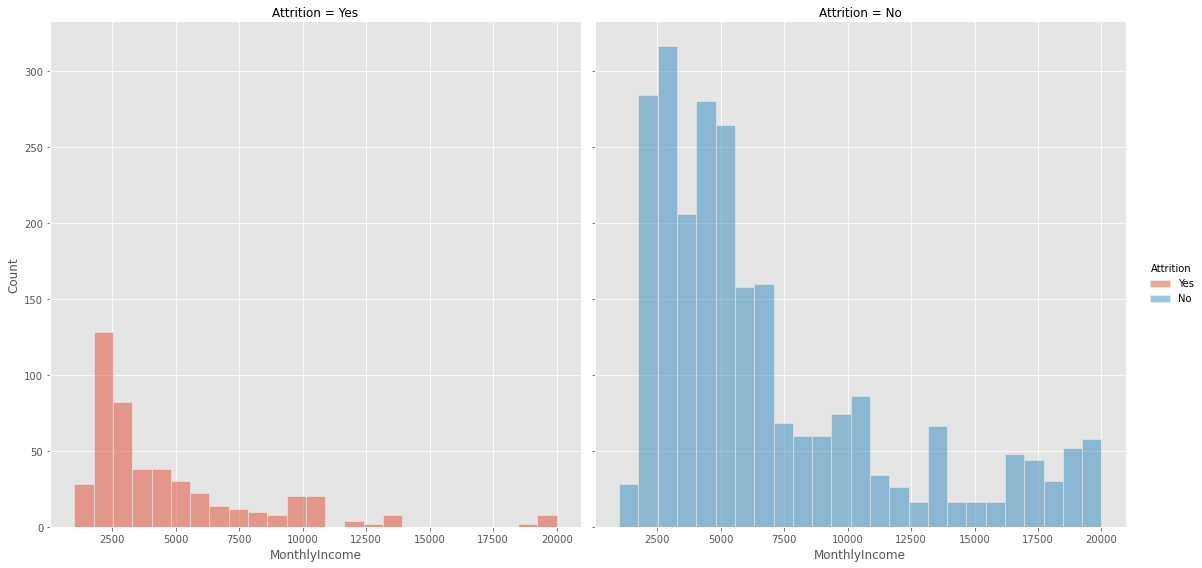

In [14]:
# "MonthlyIncome
wlb=df.groupby("WorkLifeBalance")["Attrition"].value_counts()
print(wlb)

sns.displot(data = df, x = "MonthlyIncome", hue = "Attrition",height=8,col="Attrition")
# As the Salary is increasing the Attrition rate is decreasing .



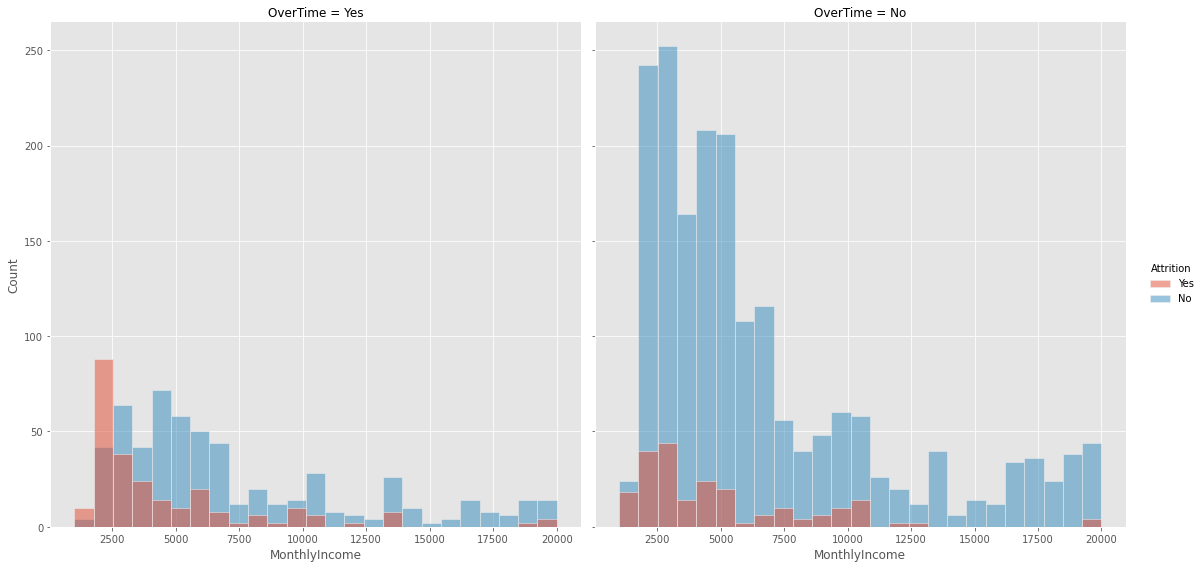

In [23]:
sns.displot(data = df, x = "MonthlyIncome", hue = "Attrition",height=8,col="OverTime")
#  People with low  income and doing overtime has high Attrition Rate .




<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

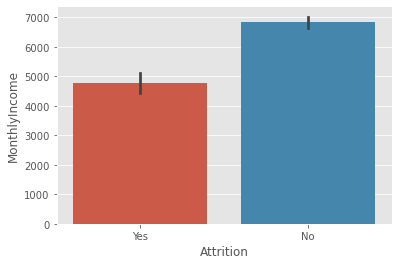

In [24]:
sns.barplot(data=df,x="Attrition",y="MonthlyIncome")
# Average MonthlyIncome Of People who dint leave was more than People who did .

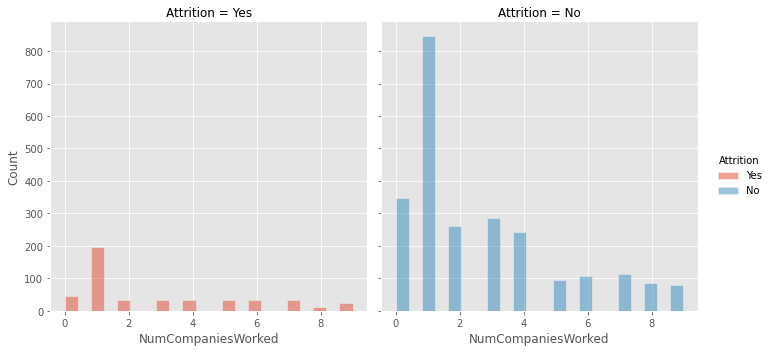

In [25]:
# JobInvolvement

sns.displot(data = df, x = "NumCompaniesWorked", hue = "Attrition",height=5,col="Attrition")

# Number of companies workoed dosent makes a difference in Attrition

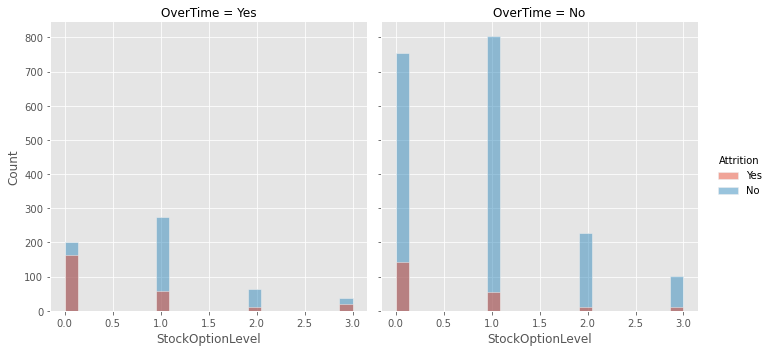

In [26]:
# StockOptionLevel
sns.displot(data = df, x = "StockOptionLevel", hue = "Attrition", col = "OverTime",height=5)
# Even with SOL of 3 close to half of them left the comapny  when doing OverTime.

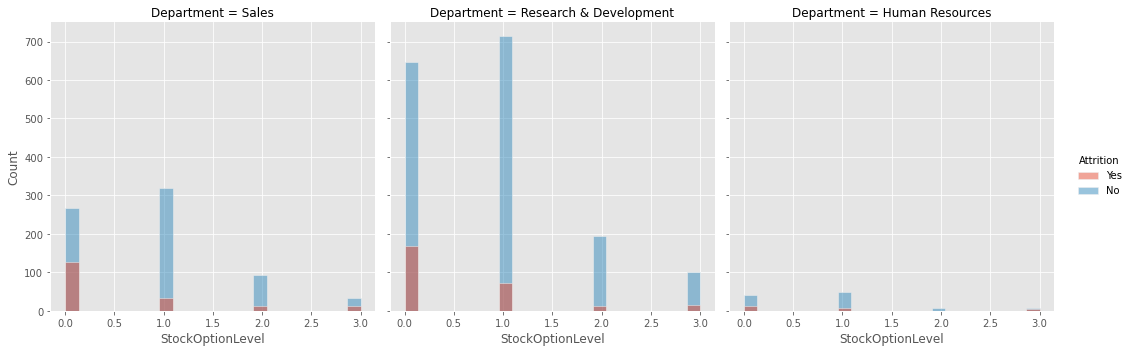

In [28]:
sns.displot(data = df, x = "StockOptionLevel", hue = "Attrition", col = "Department",height=5)
# As the SOL increases the Attrion is a seeing a decline .

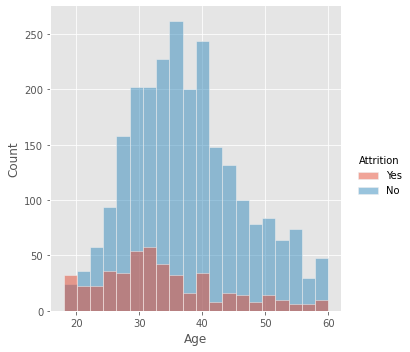

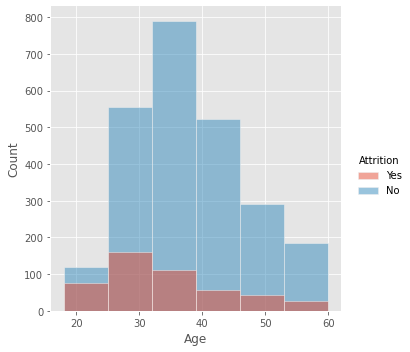

In [27]:
# Age 
sns.displot(data = df, x = "Age", hue = "Attrition",height=5,bins=20)

sns.displot(data = df, x = "Age", hue = "Attrition",height=5,bins=6)

# From Both The Graphs We Infer That Most Of Age Groupp Lie Between 25 To Under 45 And Most Attrition Is Between Age Group of
# 30 are Leaving .

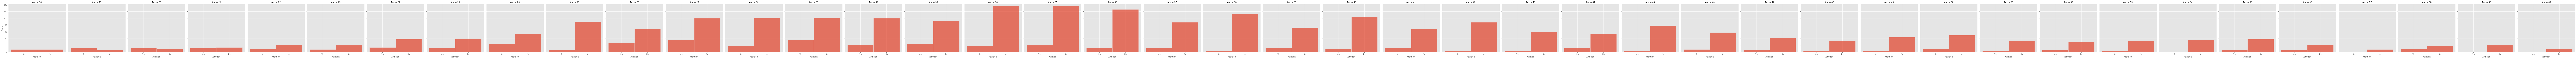

In [30]:
sns.displot(data = df, x = "Attrition", col = "Age",height=5)
# DoubleClick ON THE GRAPH TO SEE ALL THE AGE BRACKET 
# PEOPLE BELOW 25 ARE SHOWING HIGH TENDENCY TO LEAVE .

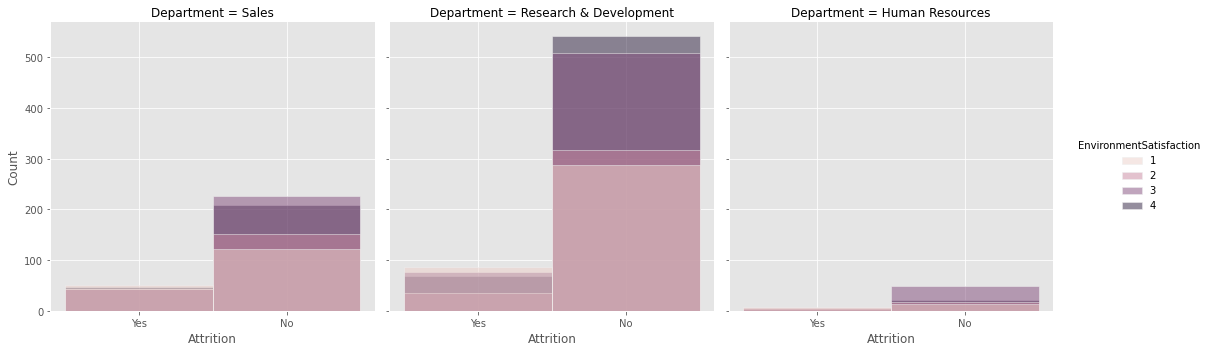

In [26]:
#Investigating the reason behind Hr department Attrition rate 
sns.displot(data = df, x = "Attrition", hue = "EnvironmentSatisfaction", col = "Department",height=5)

# We can see from hr, max people who are  leaving have low EnvironmentSatisfaction rating 

<AxesSubplot:>

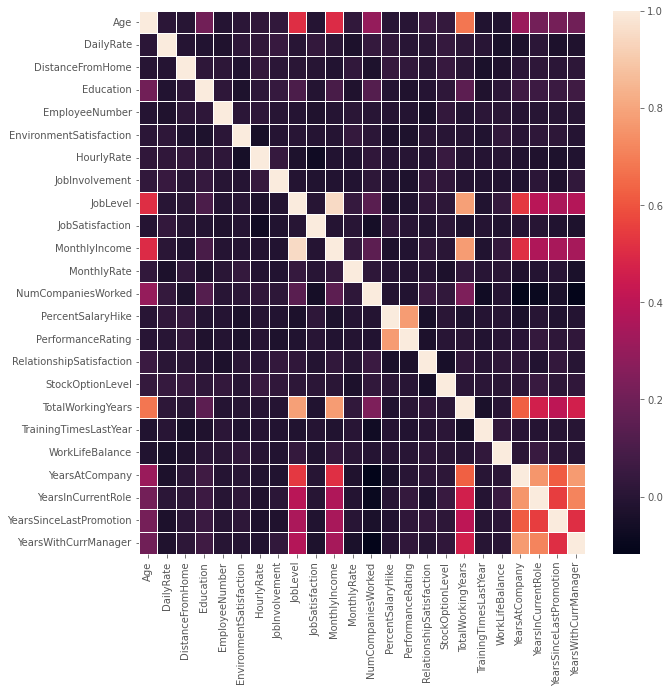

In [28]:
# Correlation
corr = df.corr("pearson")
plt.figure(figsize = (10,10))
sns.heatmap(corr, linewidth = 1)

<AxesSubplot:>

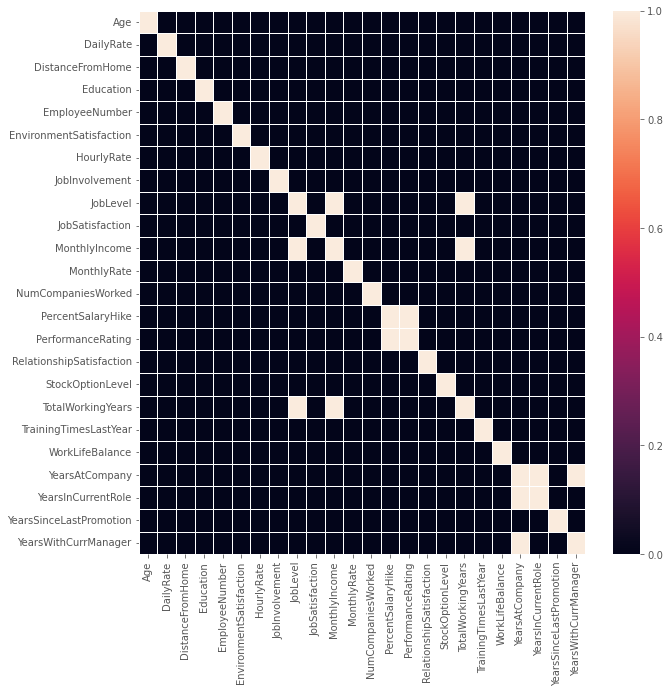

In [29]:
plt.figure(figsize = (10,10))
sns.heatmap(abs(corr) > 0.75, linewidth = 1)

# Machine Learning 


In [30]:
# Changing the target variable into 1/0

df_1=df['Attrition'].map(
                   {'Yes':1 ,'No':0})
df_1.shape

(2940,)

In [31]:
df_2=df.drop(columns=["Attrition"])

In [32]:
df_2

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,Travel_Frequently,884,Research & Development,23,2,Medical,2936,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
2936,39,Travel_Rarely,613,Research & Development,6,1,Medical,2937,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
2937,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2938,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
2938,49,Travel_Frequently,1023,Sales,2,3,Medical,2939,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [33]:
x=df_2
y=df_1

In [34]:
# Dropping correlated columns(75%)
x=x.drop(columns =["JobLevel","TotalWorkingYears","YearsAtCompany","PerformanceRating"])

<AxesSubplot:>

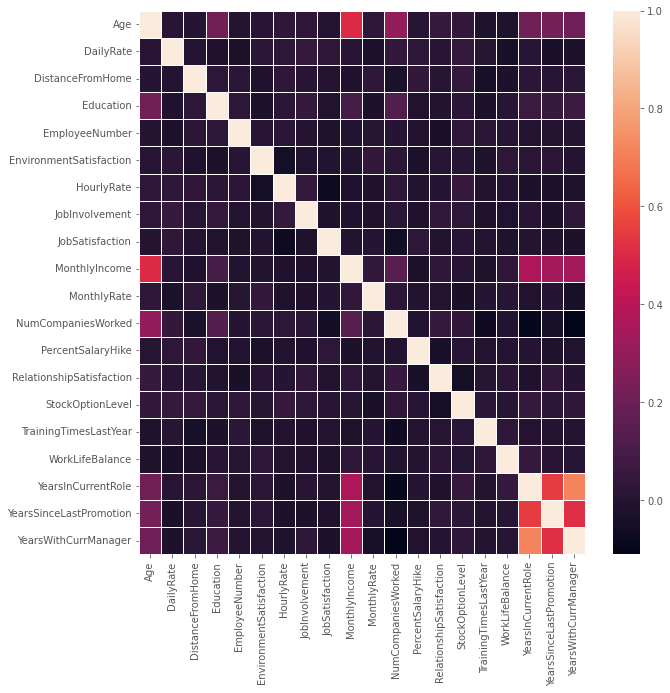

In [35]:
# Checking for correlation Again 
corr = x.corr("pearson")
plt.figure(figsize = (10,10))
sns.heatmap(corr, linewidth = 1)

<AxesSubplot:>

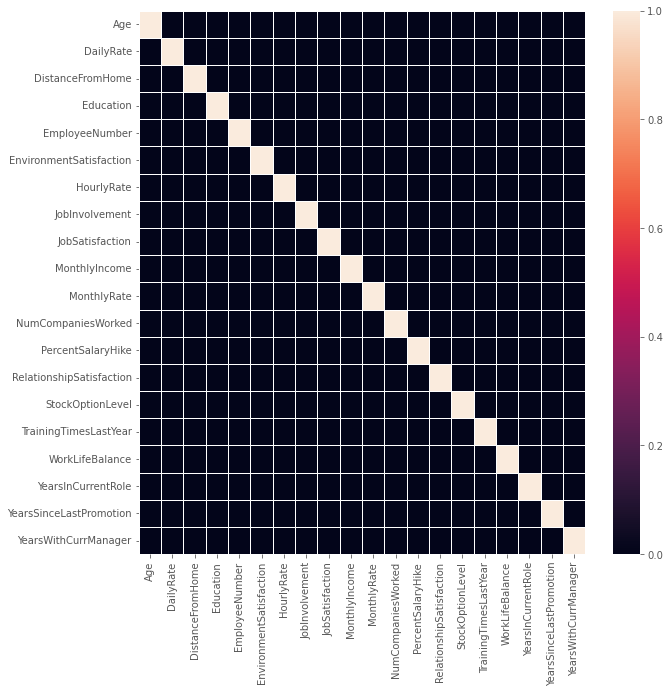

In [36]:
plt.figure(figsize = (10,10))
sns.heatmap(abs(corr) > 0.75, linewidth = 1)

In [37]:
# TrainTest Split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.20,random_state=15)


In [38]:
x_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 137 to 2693
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2352 non-null   int64 
 1   BusinessTravel            2352 non-null   object
 2   DailyRate                 2352 non-null   int64 
 3   Department                2352 non-null   object
 4   DistanceFromHome          2352 non-null   int64 
 5   Education                 2352 non-null   int64 
 6   EducationField            2352 non-null   object
 7   EmployeeNumber            2352 non-null   int64 
 8   EnvironmentSatisfaction   2352 non-null   int64 
 9   Gender                    2352 non-null   object
 10  HourlyRate                2352 non-null   int64 
 11  JobInvolvement            2352 non-null   int64 
 12  JobRole                   2352 non-null   object
 13  JobSatisfaction           2352 non-null   int64 
 14  MaritalStatus         

In [39]:
# Data Preprocessing with column transformer 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [43]:
transformer=ColumnTransformer(transformers=[
    ("tnf1",OneHotEncoder(sparse=False,drop="first"),["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"])
],remainder="passthrough")

In [51]:
x_train=transformer.fit_transform(x_train)

In [52]:
x_test=transformer.transform(x_test)

In [54]:
# Random Forest Classifier
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=15)

In [57]:
# Hyper-Parameter Optimization using GridSearchCV
np.random.seed(15)
start = time.time()

param_dist = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy'],
              }

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 2)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 19, 'max_features': 'log2'}
Time taken in grid search:  950.83


In [58]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = 'log2', 
                  max_depth = 19)

RandomForestClassifier(max_depth=19, max_features='log2', random_state=15)

In [59]:
# OOB Rate
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

C:\Users\lavit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\lavit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\lavit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\lavit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\lavit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probab

In [60]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)


<AxesSubplot:>

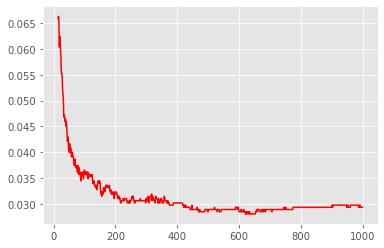

In [63]:


oob_series.plot(kind='line',color = 'red')


In [64]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=450,
                  bootstrap = False,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=False, max_depth=19, max_features='log2',
                       n_estimators=450, random_state=15)

In [65]:
# Train the RandomForest
fit_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=19, max_features='log2',
                       n_estimators=450, random_state=15)

In [81]:
## Predictions
predictions_rf = fit_rf.predict(x_test)

In [83]:
# Confusion Matrix 
print (confusion_matrix(y_test,predictions_rf))


[[485   0]
 [ 26  77]]


In [84]:
accuracy_rf = fit_rf.score(x_test,y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.956


In [85]:
# Area Under Curve (AUC)
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = fit_rf.predict_proba(x_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)

In [86]:
auc_rf = auc(fpr2, tpr2)

In [87]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

C:\Users\lavit\AppData\Local\Temp\ipykernel_1220\2153116955.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
C:\Users\lavit\AppData\Local\Temp\ipykernel_1220\2153116955.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')


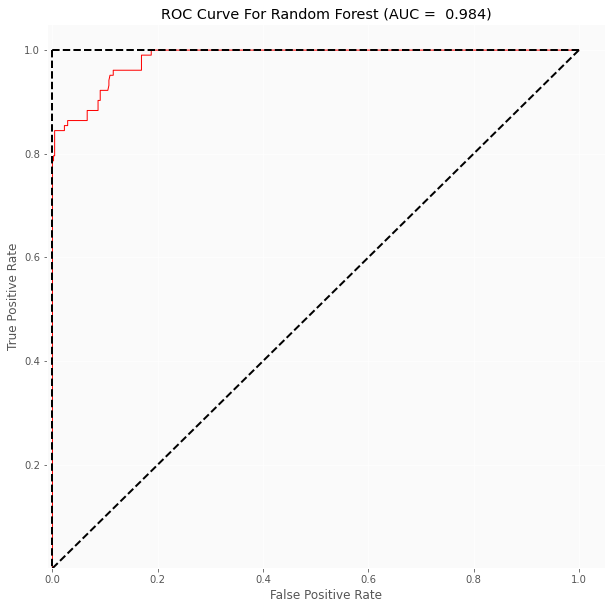

In [88]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

In [92]:
## Classification Report
dx=["yes","No"]
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            y_test, 
            target_names = dx))

In [93]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

         yes       1.00      0.95      0.97       511
          No       0.75      1.00      0.86        77

    accuracy                           0.96       588
   macro avg       0.87      0.97      0.91       588
weighted avg       0.97      0.96      0.96       588

